In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
from matplotlib import pyplot as plt
from Dataset import MakeDataset, GetImages
from sklearn.model_selection import train_test_split
from Model import UNET
from tensorflow.keras.layers import Input

Prepare the Dataset

In [2]:
img_size = 128
imgs, masks, labels = MakeDataset((img_size,img_size))

Display one image with the corresponding mask

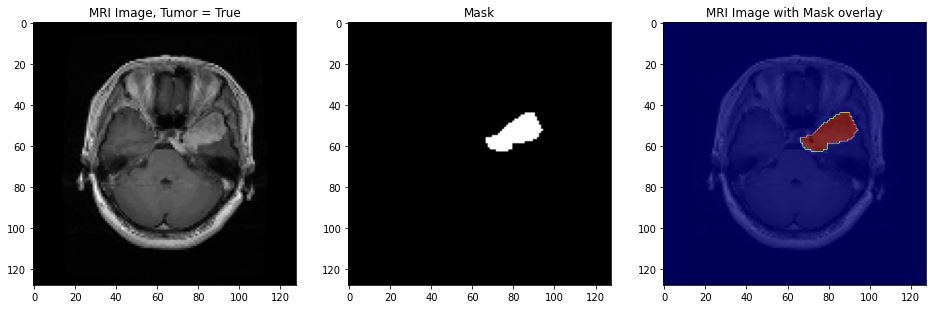

In [3]:
index = 0

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(imgs[index], cmap='gray')

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(masks[index], cmap='gray')

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(imgs[index], cmap='gray')
plt.imshow(masks[index], cmap='jet',  alpha=0.7)


ax1.title.set_text('MRI Image, Tumor = ' + str(labels[index]))
ax2.title.set_text('Mask')
ax3.title.set_text('MRI Image with Mask overlay')


Now Normalize the images and split the data in training and validations sets

In [4]:
imgs = imgs / 255.0
masks = masks / 255.0

# Shuffle it since the first 3000 images contain a tumor, while the rest doesn't
x_train, x_test, y_train, y_test = train_test_split(imgs, masks, test_size = 0.2, random_state=40, shuffle=True)

Get the U-NET Model

In [10]:
model = UNET((img_size, img_size, 1), 0.2, 32)
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ["accuracy"])
#model.summary()

In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
results = model.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
58/58 [==============================] - 80s 864ms/step - loss: 0.1953 - accuracy: 0.9776 - val_loss: 4.0522 - val_accuracy: 0.4078
Epoch 2/20
58/58 [==============================] - 47s 797ms/step - loss: 0.0961 - accuracy: 0.9886 - val_loss: 0.4979 - val_accuracy: 0.9457
Epoch 3/20
58/58 [==============================] - 46s 796ms/step - loss: 0.0715 - accuracy: 0.9886 - val_loss: 0.0939 - val_accuracy: 0.9889
Epoch 4/20
58/58 [==============================] - 43s 713ms/step - loss: 0.0559 - accuracy: 0.9889 - val_loss: 0.2214 - val_accuracy: 0.8737
Epoch 5/20
58/58 [==============================] - 49s 834ms/step - loss: 0.0464 - accuracy: 0.9899 - val_loss: 0.2849 - val_accuracy: 0.8082
Epoch 6/20
58/58 [==============================] - 47s 806ms/step - loss: 0.0400 - accuracy: 0.9903 - val_loss: 0.3267 - val_accuracy: 0.7934
Epoch 7/20
58/58 [==============================] - 50s 864ms/step - loss: 0.0350 - accuracy: 0.9908 - val_loss: 0.0597 - val_accuracy: 0.9887

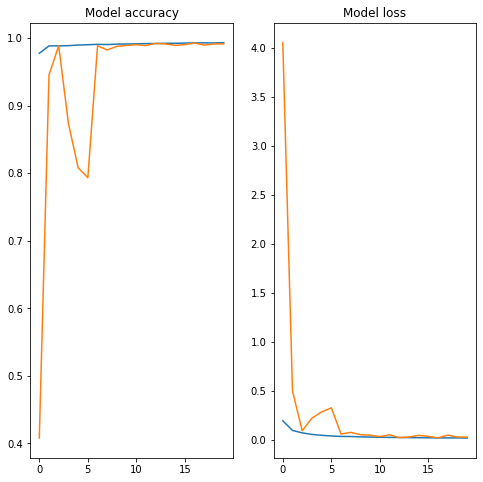

In [13]:

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])


ax1.title.set_text('Model accuracy')
ax2.title.set_text('Model loss')

Now Predict some images

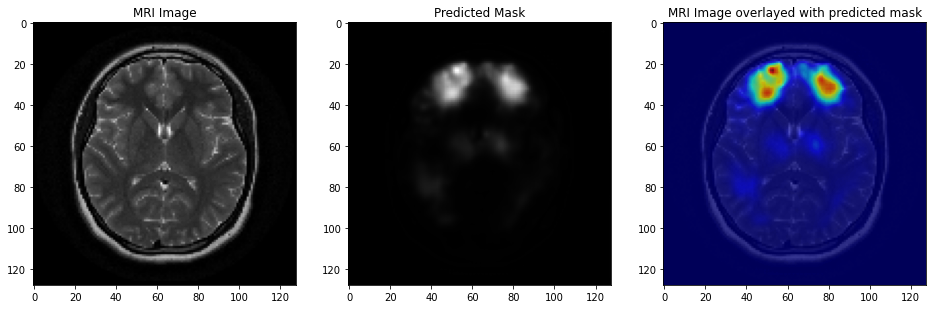

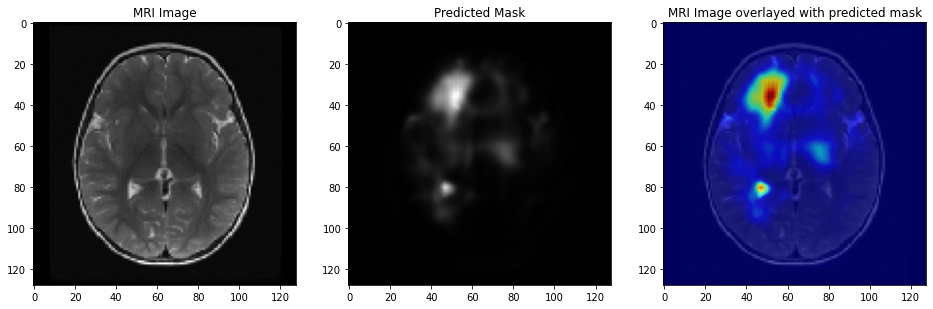

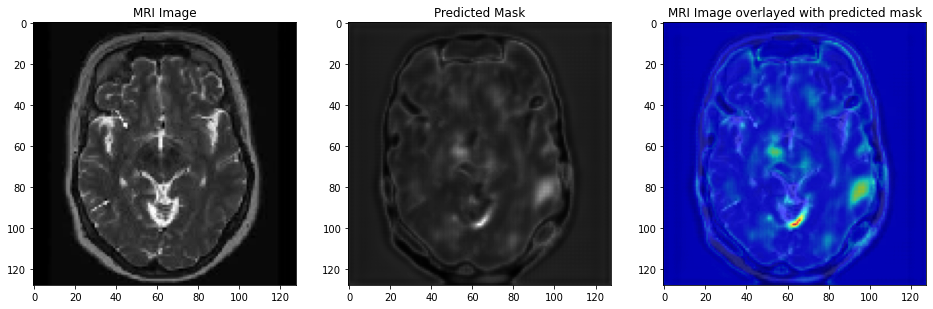

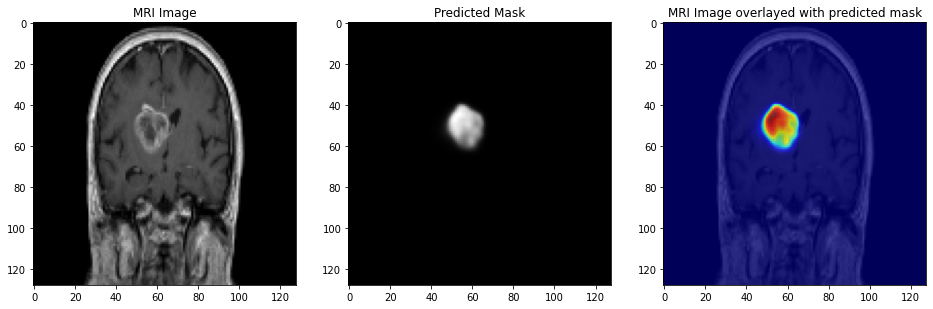

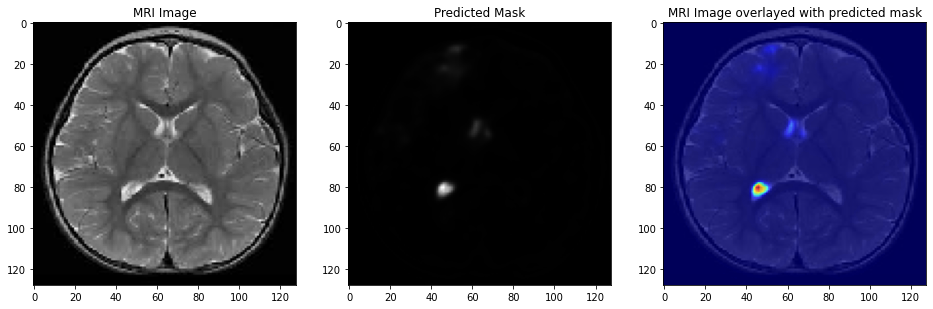

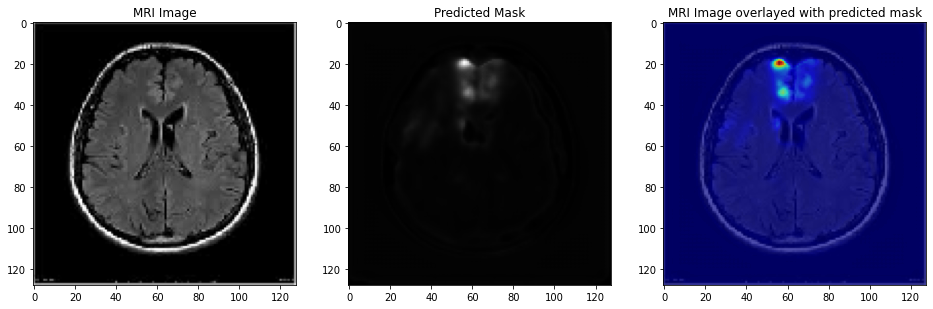

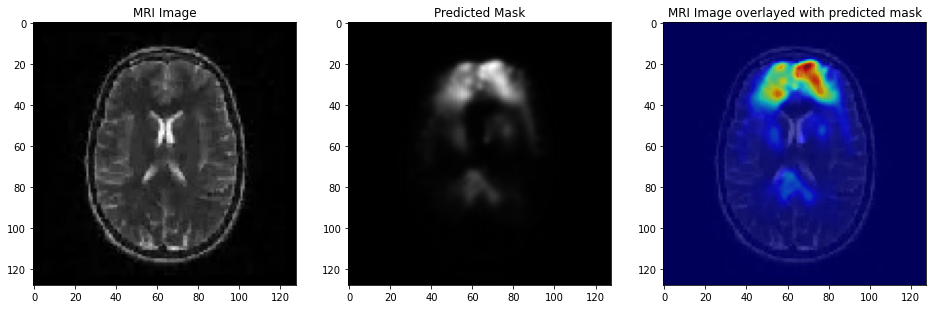

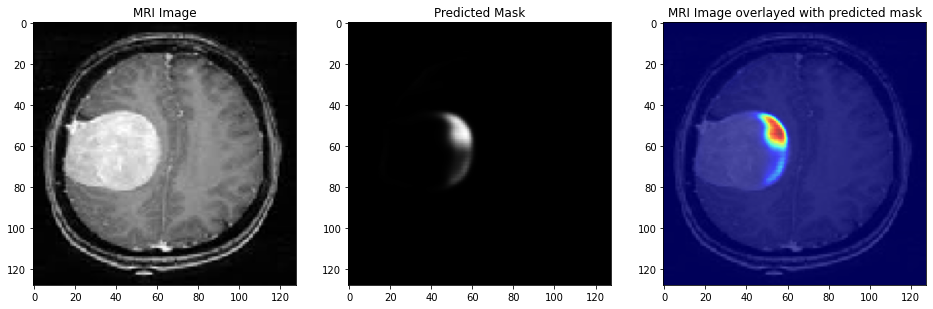

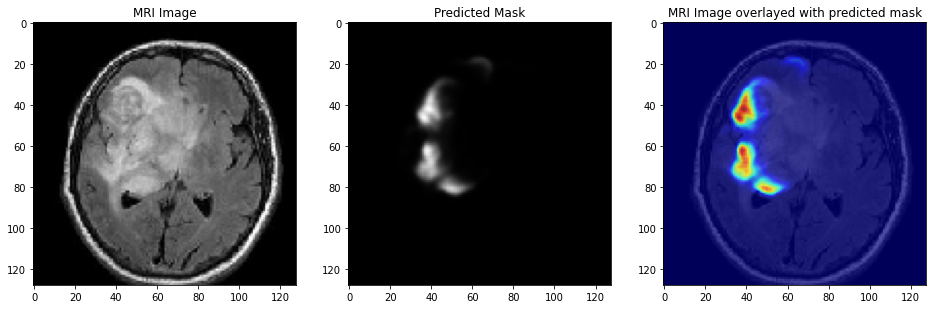

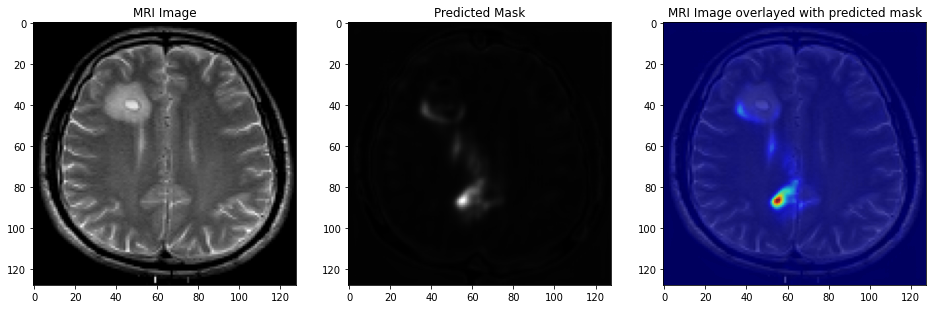

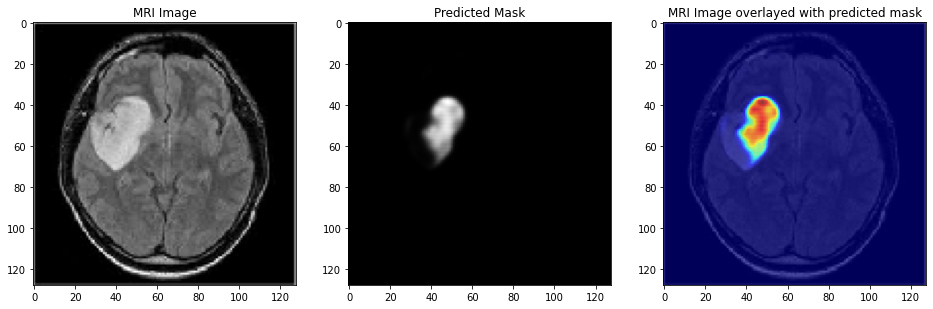

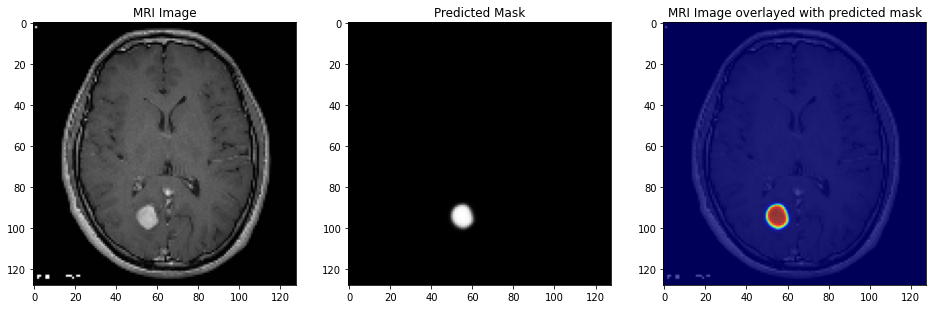

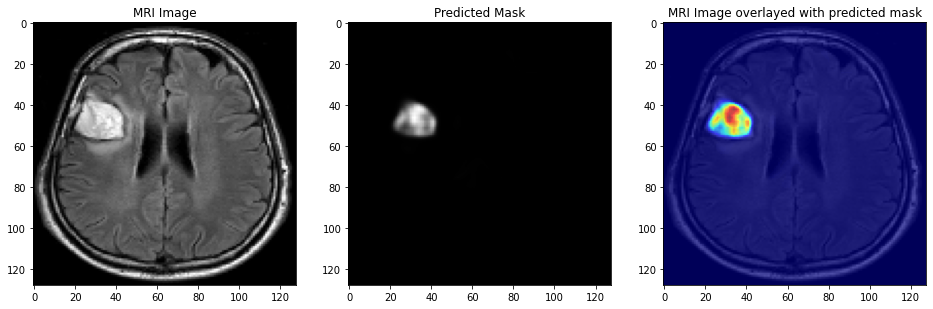

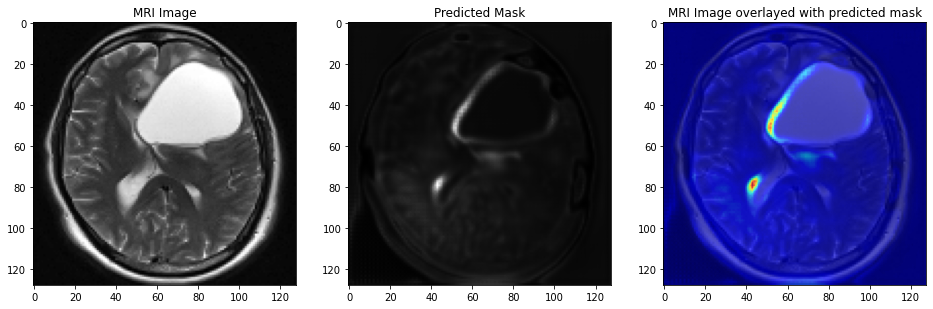

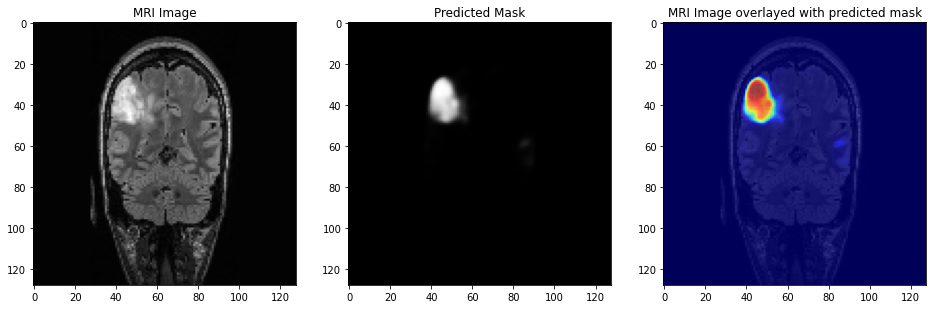

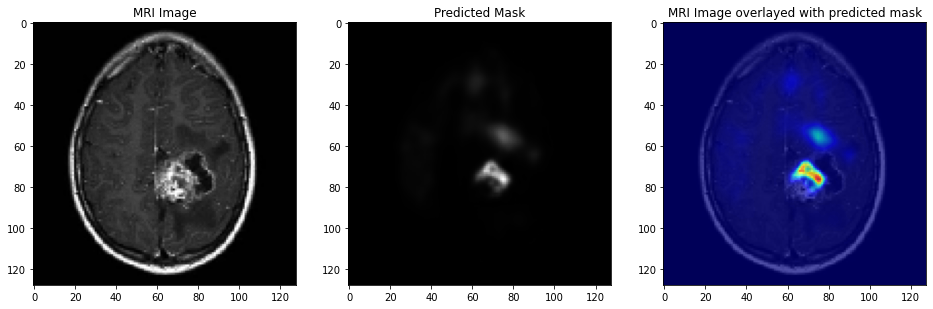

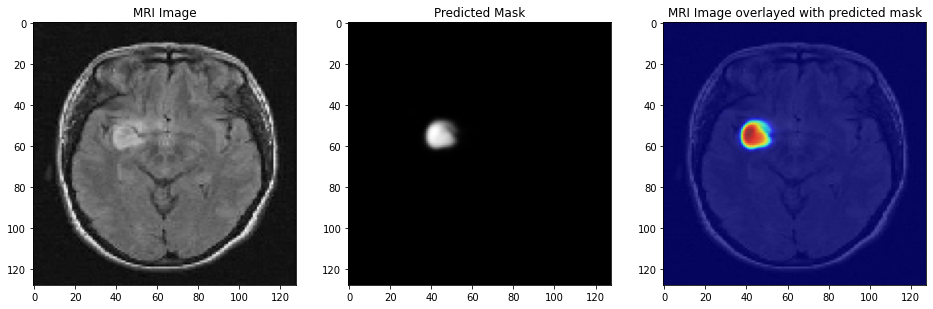

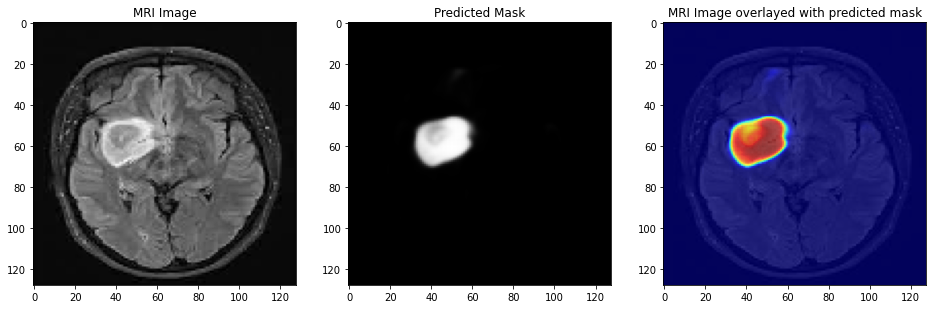

In [14]:
pred_imgs = GetImages('DataSet2/to_predict', (img_size, img_size))

for ind in range(len(pred_imgs)):   
    pred_img = pred_imgs[ind] / 255.0
    prediction = model.predict(pred_img.reshape(1, img_size, img_size, 1))
    prediction = prediction.reshape(img_size, img_size, 1)

    fig = plt.figure(figsize=(16, 16))

    ax1 = fig.add_subplot(1, 3, 1)
    plt.imshow(pred_imgs[ind], cmap='gray')

    ax2 = fig.add_subplot(1, 3, 2)
    plt.imshow(prediction, cmap='gray')

    ax3 = fig.add_subplot(1, 3, 3)
    plt.imshow(pred_imgs[ind], cmap='gray')
    plt.imshow(prediction, cmap='jet',  alpha=0.7)


    ax1.title.set_text('MRI Image')
    ax2.title.set_text('Predicted Mask')
    ax3.title.set_text('MRI Image overlayed with predicted mask')

In [15]:
#model.save('Model/Model1')

INFO:tensorflow:Assets written to: Model/Model1\assets
